In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
df=pd.read_csv('Titanic-Dataset.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [217]:
df.shape

(891, 12)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [221]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)

num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [223]:
df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [225]:
df = df.drop(columns=['Name','Ticket'])

In [227]:
df.duplicated().sum()

0

In [229]:
round((df.isnull().sum()/df.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [231]:
df = df.drop(columns='Cabin')
df.dropna(subset=['Embarked'], axis=0, inplace=True)
df.shape

(889, 9)

In [233]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [235]:
ord_data={"S":0,"C":1,"Q":2}
data=df["Embarked"].map(ord_data)

In [240]:
df=df.drop(columns=['Embarked'])

In [242]:
df['Embarked']=data

In [261]:
label={"male":0,"female":1}
df1=df['Sex'].map(label)

In [263]:
df=df.drop(columns=['Sex'])

In [265]:
df['Sex']=data

C:\Users\hp\AppData\Local\Temp\ipykernel_316\3140151352.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'], shade=True)


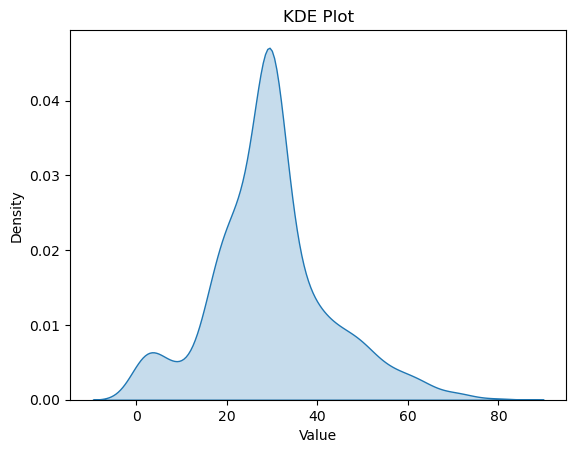

In [269]:
sns.kdeplot(df['Age'], shade=True)
plt.title("KDE Plot")
plt.xlabel("Value")
plt.show()

In [271]:
df = df.fillna(df.Age.mean())
df.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Sex         0
dtype: int64

In [259]:
df=df.drop(columns=['PassengerId'])

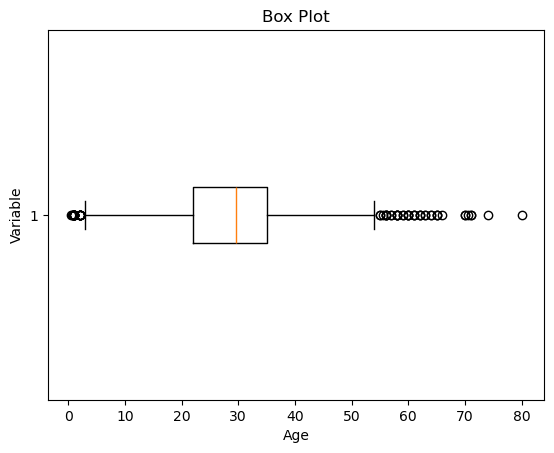

In [277]:
plt.boxplot(df['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

In [279]:
mean = df['Age'].mean()
std  = df['Age'].std()

lower_bound = mean - std*2
upper_bound = mean + std*2

print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)
df = df[(df['Age'] >= lower_bound) 
                & (df['Age'] <= upper_bound)]

Lower Bound : 3.705400107925648
Upper Bound : 55.578785285332785


In [292]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
count,821.00000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000
mean,0.37637,2.341048,29.141474,0.496955,0.349574,31.417590,0.361754,0.361754
std,0.48477,0.825291,10.081243,1.082703,0.795316,50.051174,0.639702,0.639702
min,0.00000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,2.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,0.00000,3.000000,29.642093,0.000000,0.000000,13.000000,0.000000,0.000000
75%,1.00000,3.000000,34.000000,1.000000,0.000000,30.000000,1.000000,1.000000
max,1.00000,3.000000,55.500000,8.000000,6.000000,512.329200,2.000000,2.000000


In [296]:
X = df[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
Y = df['Survived']